### Summary of the problem statement
Pneumonia is in the list of top 10 causes for death in the US. It accounts for 15% of all death in children under the age of 5 internationally. Accurately diagnosing Pneumonia is an elaborate process. It requires review of Chest Radiograph by trained specialists and other detailed examination. Due to the high volume of Chest X-Ray review the specialists are burdened with, screening the radiographs for opacity which indicated pneumonia using AI to prioritize and expedite review is seen a possible solution.

### The Dataset - BIG DATA
The dataset contains images with details in DICOM® format. DICOM® (Digital Imaging and Communications in Medicine) is the international standard to transmit, store, retrieve, print, process, and display medical imaging information. DICOM images are special images with metadata. Each image has information about itself.

The actual data set that has 26684 training and 3000 test X-ray images. The images are annotated with bounding boxes to highlight the region in the X-ray that is indicative of possible Pneumonia. For the purpose of this training, we have reduced it to 100 images and their respective data in the file Patient_images.zip. Unzip this file into a directory named "stage_2_train_images". *To make it more challenging, find the package python uses to unzip and you can unzip the file in your code*

### The normal structured data
All the patient outcomes and the infected area are stored in the CSV File Patient_details.csv. This also contains 100 records which pertain to each of the patients whose image details we have in the zip file. 


In [1]:
!pip install pydicom

In [4]:
# Installing & Importing Required Packages

import pandas as pd
import matplotlib.pyplot as plt 
import pydicom
import numpy as np
from pydicom import dcmread

In [6]:
patient_df = pd.read_excel("Patient_Details_opt.xls")

In [7]:
patient_df

,patientId,x,y,width,height,Target,class
0,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1,Lung Opacity
1,00436515-870c-4b36-a041-de91049b9ab4,264,152,213,379,1,Lung Opacity
2,00436515-870c-4b36-a041-de91049b9ab4,562,152,256,453,1,Lung Opacity
3,00436515-870c-4b36-a041-de91049b9ab4,562,152,256,453,1,Lung Opacity
4,00704310-78a8-4b38-8475-49f4573b2dbb,323,577,160,104,1,Lung Opacity
...,...,...,...,...,...,...,...
395,0808c4af-9ed6-46e3-a936-2cafb0004e6a,138,541,232,263,1,Lung Opacity
396,0808c4af-9ed6-46e3-a936-2cafb0004e6a,138,541,232,263,1,Lung Opacity
397,0808c4af-9ed6-46e3-a936-2cafb0004e6a,525,520,274,338,1,Lung Opacity
398,0808c4af-9ed6-46e3-a936-2cafb0004e6a,525,520,274,338,1,Lung Opacity


In [8]:
# Storing PatientIds as list as list because they are the  file name of DCIM images, hence it will help to read the images 

patientID = patient_df.patientId.unique().tolist()

In [9]:
path='.\\stage_2_train_images\\' #If you are using a windows machine use '\\' instead of '/'

In [10]:
# Print dcm files from the directory
import glob
print(glob.glob(".\\stage_2_train_images\\*.dcm"))

['.\\stage_2_train_images\\00436515-870c-4b36-a041-de91049b9ab4.dcm', '.\\stage_2_train_images\\00704310-78a8-4b38-8475-49f4573b2dbb.dcm', '.\\stage_2_train_images\\00aecb01-a116-45a2-956c-08d2fa55433f.dcm', '.\\stage_2_train_images\\00c0b293-48e7-4e16-ac76-9269ba535a62.dcm', '.\\stage_2_train_images\\00f08de1-517e-4652-a04f-d1dc9ee48593.dcm', '.\\stage_2_train_images\\0100515c-5204-4f31-98e0-f35e4b00004a.dcm', '.\\stage_2_train_images\\010ccb9f-6d46-4380-af11-84f87397a1b8.dcm', '.\\stage_2_train_images\\012a5620-d082-4bb8-9b3b-e72d8938000c.dcm', '.\\stage_2_train_images\\0174c4bb-28f5-41e3-a13f-a396badc18bd.dcm', '.\\stage_2_train_images\\019d950b-dd38-4cf3-a686-527a75728be6.dcm']


In [11]:
# Read all the files from directory 
image_list = glob.glob(".\\stage_2_train_images\\*.dcm")


In [12]:
#Read all the dicom files into an array
dcm_data=[]
ds=[]
for images in image_list:
    dcm_data.append(pydicom.read_file(images))  
    ds_var1 = dcmread(images)
    ds.append(ds_var1.PatientID)

In [13]:
#We will examine one random dicom image. The image is stored as an attribute array
random_integer = np.random.randint(0,10)
random_dicom = dcm_data[random_integer]
print(type(random_dicom))

<class 'pydicom.dataset.FileDataset'>


As we can see, each dicom file is read as a **FileDataSet**. All kind of Big Data have ways to deal with them. For dicom images, it is **FileDataSet** which contains the image and metadata. For the purpose of this exercise we will only retrieve the image attribute, which is stored as a ndarray named **pixel_array**. You can challenge yourself to explore what other attributes of the FileDataSet has.

patientId    00c0b293-48e7-4e16-ac76-9269ba535a62
x                                             650
y                                             511
width                                         206
height                                        284
Target                                          1
class                                Lung Opacity
Name: 15, dtype: object


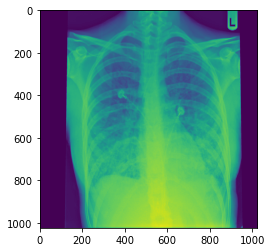

In [14]:
plt.imshow(random_dicom.pixel_array)
print(patient_df[patient_df["patientId"] == ds[random_integer]].iloc[-1,:])

We can run it through a loop and process all the images just like how we retrieved a random one. 